In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Hypothesis Testing

## What will we accomplish

In this notebook we will:
- Introduce the idea of Hypothesis Testing.
- Define the following terms:
    - Null hypothesis
    - Alternative hypothesis
    - $p$-value
    - The size of a test
    - The power function of a test
- Discuss common misunderstandings

Note:  This notebook contains a **high level summary** of hypothesis testing, putting it in a framework which is general enough to capture all of the tests we would like to cover in this bootcamp.  If you have never taken a statistics class before it might go over your head.  If that is the case, I can highly recommend working through some of the free materials available through the Penn State Statistics department such as [stat415](https://online.stat.psu.edu/stat415/) or [stat500](https://online.stat.psu.edu/stat500/).

## Sweeping some philosophical issues under the rug

>  Given that statisticians operate with an implicit philosophy, whether they know it or
not, it is better that they avail themselves of an explicitly thought-out philosophy that serves
practice in useful ways. - Brian Haig

In our study of hypothesis testing we must confront a **big question**: how do we decide what to believe about reality given evidence which is inherently incomplete?  This question doesn't have anything like a definitive answer.

Statistical hypothesis testing always starts by making assumptions about the relationship between our particular sample and reality.  The conclusions we reach are thus always conditional on certain assumptions being met.  We will try to be explicit about these assumptions, but it is up to you to form an "explicitly thought-out philosophy that serves practice in useful ways".

## A Motivating Example:  the one sided Z-test

> Warning:  the facts in this motivating example are made up!

In this first motivating example we explain all of the ideas intuitively, with copious pictures, before diving into a more formal presentation.

A large study has found that 18 year olds can [hear a maximum frequency](https://decibelhearing.com/hearing-loss-overview/high-frequency-hearing-loss/) of $17,400 \textrm{ Hz}$.  The study found that this maximum perceptible frequency (MPF) is normally distributed amongst 18 year olds, with a standard deviation of $\pm 1000 \textrm{ Hz}$.

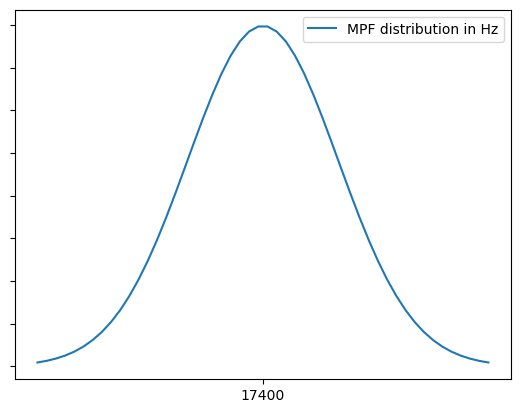

In [2]:
xs = np.linspace(14400, 20400)
distribution = norm(loc = 17400, scale = 1000)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(xs, distribution.pdf(xs), label = 'MPF distribution in Hz')
ax.set_xticks([17400])
ax.set_yticklabels([])

plt.legend()
plt.show()

You work for a company that manufactures headphones.  The company received a complaint from an 18 year old who claims that the use of these headphones has negatively impacted their MPF.  The company would like you to design a study to determine whether or not use of these headphones lowers MPF in 18 year olds.

Since the distribution of MPF is already well known in this population you do not feel the need to collect data from non-users.  You plan to randomly select some number of 18 year olds who have purchased the headphones and pay them some money to participate in your study. Before we start collecting data we should consider a number of points:

### Study Design

We should bend over backwards to avoid introducing bias into our experiment:
* Define rigorous inclusion/exclusion criteria.  For example, what is the minimum number of hours of usage we will accept from a participant?
* We should make sure that the measurement is conducted by someone who doesn't have a stake in the outcome of the experiment.
* We should make sure that our participants are selected at random as best as possible.
    * For example, if we only recruited participants from one neighborhood it is possible that some other environmental factor (such as a nearby train line) could be responsible for a change in MPF.
* There are probably many more design considerations we should attend to!

### Null and Alternative Hypotheses

Our **null hypothesis** $H_0$ is that 18 year olds who use our headphones have a MPF of $17,400$.  Our **alternative hypothesis** $H_a$ is that they have a MPF of less than $17,400$.  This is an example of a **one-tailed test**.
 * Note:  Some of you may be experiencing a "knee-jerk reaction" against the use of a one tailed test.  However it really is appropriate in this case.  If our headphones actually improve MPF this might be interesting to us but it would not impact our decision to pull these headphones from the market.  A one-tailed test will allow us to achieve the same power with a lower sample size, which is especially important when keeping costs under control is a concern.

### The "Size of the test" ($\alpha$)

Even if the headphones have no impact on MPF it is possible that the sample we gather could, through random variation alone, have a mean sample MPF which is substantially lower than $17,400$.  If the sample mean ends up being $17,000$ should we be concerned?  What about $14,000$?  This cutoff should depend on the sample size $n$, since the variance of the mean decreases with sample size.  We would like to make sure that the cutoff limit we choose limits our possibility of making a **type I error**.  In other words, we don't want to claim that the headphones are harming people when they actually are not.  We should decide at the outset what the **size** ($\alpha$) of our test should be:  how often are we okay with our testing procedure making a type I error?  Let's go with the conventional $\alpha = 0.05$ for this study.  Note that sticking to $\alpha = 0.05$ means that our cutoff sample mean MPF will approach $17,400$ as $n$ increases.

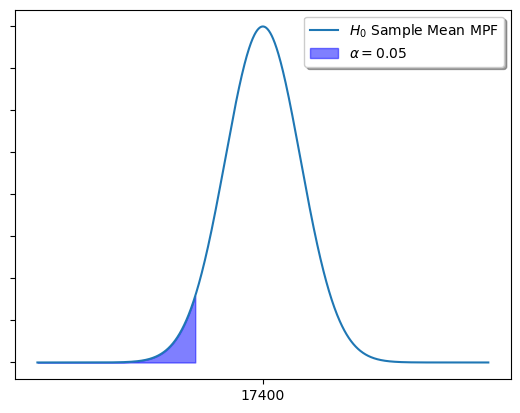

In [3]:
xs = np.linspace(14400, 20400, 1000)
distribution = norm(loc=17400, scale=500)
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(xs, distribution.pdf(xs), label='$H_0$ Sample Mean MPF')
ax.fill_between(np.linspace(14400, 16500), distribution.pdf(np.linspace(14400, 16500)), color='b', alpha=0.5, label='$\\alpha = 0.05$')

ax.set_yticklabels([])
ax.set_xticks([17400])

plt.legend(loc='upper right', fancybox=True, shadow=True)

plt.show()


If we *assume* the null hypothesis that $\mu = 17400 = \mu_0$, the distribution of the mean $\bar{\textbf{X}}$ will be distributed as $\mathcal{N}\left(\mu_0, \frac{\sigma^2}{n}\right)$ where $n$ is the sample size.  We will decide on a **rejection region** $\bar{\textbf{X}} < c$ to make the probability of type I error equal to $\alpha = 0.05$.

Since $\bar{\textbf{X}} \sim \mathcal{N}\left(\mu_0, \frac{\sigma^2}{n}\right)$, $Z = \frac{\bar{\textbf{X}} - \mu_0}{\sigma/ \sqrt{n}}$ is standard normal distributed.  This makes it convenient to work with this **test statistic**, since the test statistic has a distribution which is independent of $n$.  Our rejection region is $Z < \Phi^{-1}(\alpha) = z_{\alpha}$.

Unraveling this back to a limit on $\bar{X}$ we have

$$
\begin{align*}
&Z < z_\alpha\\
&\frac{\bar{\textbf{X}} - \mu_0}{\sigma/ \sqrt{n}} < z_\alpha\\
&\bar{\textbf{X}} < \mu_0 + \frac{\sigma}{\sqrt{n}} z_\alpha = c
\end{align*}
$$

So our threshold for rejecting $H_0$ will be $c = \mu_0 + \frac{\sigma}{\sqrt{n}} z_\alpha$.  In our particular situation, $\mu_0 = 17400 - \frac{1000}{\sqrt{n}} (1.645)$ since $z_{0.05} \approx -1.645$.

In [4]:
# here is how to calculate that using scipy.stats.norm
norm.ppf(0.05)

np.float64(-1.6448536269514729)

Notice that this means that if wearing the headphones has *any* negative impact on MPF, a large enough sample size will cause us to reject our null hypothesis. **Statistical significance is not the same as practical significance**.  While a large enough study might turn up a $0.1 \textrm{ Hz}$ impact from the headphones, this would be of no practical significance.  This leads us to our next point!

### Statistical Power ($1 - \beta$)

We would also like to minimize our chance of making a **type II error**.  If the headphones actually are harming people we don't want our test to miss that!  Our **type II error rate** ($\beta$) will depend on our sample size *and* the actual effect size.  What amount of MPF reduction would we consider to be practically significant?  For instance, if the product does lower MPF but only by $0.1 \textrm{ Hz}$ it could be argued that this is practically insignificant:  we wouldn't really mind if we mistook this for no effect.  For the purposes of this example, let's say that we would like our study to have enough **power** ($1 - \beta$) to detect a minimum meaningful effect size of $200 \textrm{ Hz}$.  Let's go with a conventional power of $0.8$ (i.e. $\beta = 0.2$) for this study.  This will be enough information to figure out our minimum sample size.
* Note: It is important to calculate power *before* doing the study.  This is called "ex ante" ("before the event") power analysis as opposed to "ex post" ("after the event") power analysis.
* Note:  While I have gone with "default" values of $0.05$ size and $0.8$ power, these should really be subject to cost benefit analysis.  What are the costs to the company of type I and type II errors?  Asking for a lower size or higher power will both require an increase in sample size which has costs as well.  What is my budget for this experiment?  Can I make a business case for a larger budget?

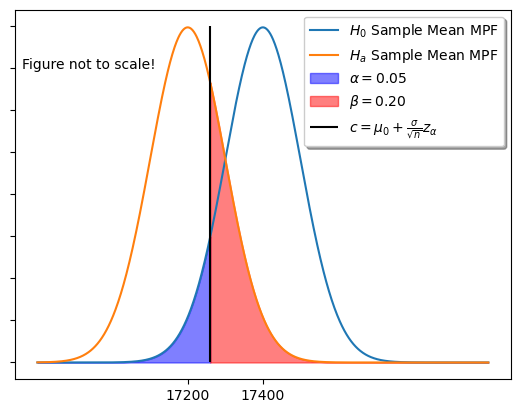

In [5]:
xs = np.linspace(14400, 20400, 1000)
distribution = norm(loc = 17400, scale = 500)
fig = plt.figure()
ax = plt.subplot(111)

ax.text(14200,0.0007, 'Figure not to scale!')
ax.plot(xs, distribution.pdf(xs), label = '$H_0$ Sample Mean MPF')
ax.plot(xs, distribution.pdf(xs + 1000), label = '$H_a$ Sample Mean MPF')

c = 16700
ax.fill_between(np.linspace(14400, c, 1000),distribution.pdf(np.linspace(14400, c, 1000)), color = 'b', alpha = 0.5, label = '$\\alpha = 0.05$')
ax.fill_between(np.linspace(c, 20400, 1000),distribution.pdf(np.linspace(c, 20400, 1000) + 1000), color = 'r', alpha = 0.5, label = '$\\beta = 0.20$')

ax.vlines(c,0,0.0008, 'k',label = '$c = \\mu_0 + \\frac{\\sigma}{\\sqrt{n}} z_\\alpha$')
ax.set_yticklabels([])
ax.set_xticks([16400,17400])
ax.set_xticklabels([17200,17400])


plt.legend(loc='upper right', fancybox=True, shadow=True)

plt.show()

For a dynamic version of this graphic, see [this desmos link](https://www.desmos.com/calculator/sm5fcvx1po).

Now let's *assume* that the population mean of headphone users is the minimum meaningful effect size $\mu_{\textrm{mmes}} = 17400 - 200 = 17200$.  Then the sampling distribution is actually $\bar{\textbf{X}} \sim \mathcal{N}\left(\mu_{\textrm{mmes}}, \frac{\sigma^2}{n}\right)$.  So the distribution of our test statistic under this assumption is $N\left(\frac{\mu_\textrm{mmes} - \mu_0}{\sigma / \sqrt{n}}, 1\right)$

#### Derivation of sample size formula

It is useful to perform this calculation using *standardized* units.

We define the effect size $d$ by:

$$
d = \frac{\mu_{\textrm{mmes}} - \mu_0}{\sigma}
$$

To detect an effect size $d$ with a specified significance level $\alpha$ and power $1 - \beta$, we need to satisfy the following condition:

$$
\text{Power} = P\left(\frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} < z_\alpha \text{ under } H_a\right) = 1 - \beta
$$

As previously stated, under the alternative hypothesis ($H_a$), the test statistic follows:

$$
\frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \sim N\left(\frac{\mu_a - \mu_0}{\sigma / \sqrt{n}}, 1\right)
$$

This can be rewritten as:
$$
\frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} = \frac{\mu_a - \mu_0}{\sigma / \sqrt{n}} + \frac{\bar{X} - \mu_a}{\sigma / \sqrt{n}}
$$

Under $H_a$, $\frac{\mu_a - \mu_0}{\sigma / \sqrt{n}} = d \sqrt{n}$, so:
$$
\frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} = d \sqrt{n} + \frac{\bar{X} - \mu_a}{\sigma / \sqrt{n}}
$$

The distribution of $\frac{\bar{X} - \mu_a}{\sigma / \sqrt{n}}$ is standard normal $N(0,1)$. Therefore, the power equation becomes:
$$
\text{Power} = P\left(d\sqrt{n} + Z < z_\alpha\right) = 1 - \beta
$$
where $Z \sim N(0,1)$.

Subtract $d\sqrt{n}$ from both sides:
$$
P\left(Z < z_\alpha - d\sqrt{n}\right) = 1 - \beta
$$

The power $1 - \beta$ corresponds to the probability of $Z$ being less than $z_{1-\beta} = -z_\beta$.  There is a tricky sign issue here!  Look at the picture to see why we should use $z_{1-\beta}$ instead of $z_{\beta}$.

$$
-z_{\beta} = z_\alpha - d\sqrt{n}
$$

Solving for $n$, the sample size is:
$$
n = \left(\frac{z_\alpha + z_\beta}{d}\right)^2
$$

### Using this for our study

Assume:
- Desired significance level $\alpha = 0.05$, so $z_\alpha = -1.645$ (for a one-tailed test).
- Desired power $1 - \beta = 0.80$, $\beta = 0.2$ and $z_\beta = -0.84$.
- Effect size $d = \frac{200}{1000} = 0.2$.

Plugging in the values:
$$
n = \left(\frac{-1.645 + -0.84}{0.2}\right)^2 = \left(\frac{2.485}{0.2}\right)^2 = \left(12.42\right)^2 \approx 154.3
$$

So we need a sample size of at least $155$ to detect an effect size of $200 \textrm{ Hz}$ with 80% power and a 5% significance level.

If we used $155$ as our sample size, then we can write the rejection region as:

$$
\bar{\textbf{X}} < 17400 - \frac{1000}{\sqrt{155}} (1.645) = 17267.8
$$

So if we measure a mean MPF of $17267.8$ or less from our test subjects, we will accept the alternative hypothesis that wearing these headphones does negatively impact the MPF.

### $p$-values

Say we conduct our study and the sample mean turns out to be $17235 \textrm{ Hz}$.  From our work above we know this is a statistically significant result!

We can also give the $p$-value associated with this test.  The $p$-value is defined to be the probability, under the null hypothesis, of seeing a result at least as "extreme" the sample we obtained.  In this case, the probability that $\bar{\textbf{X}} < 17235$ under the null hypothesis is 

$$
\begin{align*}
P(\bar{\textbf{X}} < 17235) 
&= P(\bar{\textbf{X}} - 17400 < -165)\\
&= P(\frac{\bar{\textbf{X}} - 17400}{1000}\sqrt{155} < -\frac{165\sqrt{155}}{1000})\\
&= P(Z < -\frac{165\sqrt{155}}{1000})\\
&\approx 0.02
\end{align*}
$$

In [6]:
norm.cdf(-165*np.sqrt(155)/1000)

np.float64(0.019976551967078555)

It is important to interpret this $p$-value correctly:  it says that *if* the null hypothesis were true, then we could expect to see a sample mean MPF this low, or lower, roughly $2$ percent of the time.

There are many common misconceptions about $p$-values.  In particular:

1. A low $p$-value does **not** indicate a strong effect.  I must again re-iterate that **statistical significance is not practical significance**.
    * A confidence interval is more informative here!
2. The $p$-value is **not** the probability that the null hypothesis is true.  The structure of a significance test is similar to a proof by contradiction.  We assume the null hypothesis and then quantify how unlikely our sample is.  If our sample is rare, then we reject the null hypothesis.  Nothing we derive under the *assumption* of the null hypothesis could ever count as evidence *for* the null hypothesis!
3. As a corollary to the second point, a high $p$-value does **not** mean that the null hypothesis is likely to be true! 
4. As another corollary to the second point, a low $p$-value should only count as evidence of the alternative hypothesis if we strongly believe that the model is well-specified!
    * As an example, you can get a very low $p$-values for the slope of a simple linear regression when you regress on data with the true relationship $y = x^2 + \epsilon$ for $x$ in, say, $[1,5]$.  This says that *if we assume that SLR fits the data* then it would be very unlikely to observe our sample given that the slope is $0$.  A low $p$-value cannot fix a bad model!

###  Hypothesis tests you should know

In this motivating example we walked through the logic of the one sided $z$-test for a single sample mean.

You should probably know a few of the most common hypothesis tests!  These include:

* Tests for a difference in proportions
    * [Fisher's Exact Test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test)
    * [$\Chi^2$ Test](https://en.wikipedia.org/wiki/Chi-squared_test)
* Tests for means (single mean, two sample mean, paired difference)
    * [$Z$ Test](https://en.wikipedia.org/wiki/Z-test) when variance is known (rare) or for large sample sizes as an approximation.
    * [Student's $t$-test](https://en.wikipedia.org/wiki/Student%27s_t-test)    
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [ANCOVA](https://en.wikipedia.org/wiki/Analysis_of_covariance)

Expositions of these are widely available:  the Penn State courses I linked to at the beginning of these notebooks for example.  We will see that many of these can be derived as special cases of hypothesis tests about multiple linear regression models.

## Towards more precise and general definitions

We give a lightning fast overview of some more general definitions to satisfy those of you who desire precision in your use of language.

Note:  The definitions in this section are taken or lightly modified from the second edition "Statistical Inference" by Casella and Berger.  This is a standard textbook for a first year graduate course in statistical inference.  The material in this textbook is, anecdotally, a popular source of interview questions for DS jobs which are are more heavily focused on statistics.

Most (but not all) hypothesis tests can be viewed as statements about nested models.  We have a statistical model (aka parameterized family of probability distributions) $F_\theta$ of our data generating process.

**Definition**:  Let $\Theta$ be the collection of all possible values of the parameter $\theta$.  A *null hypothesis* is a statement of the form $H_0: \theta \in \Theta_0$ where $\Theta_0$ is some subset of $\Theta$. The *alternative hypothesis* is then $H_a: \theta \in \Theta_0^c$.

Since $\Theta_0 \subset \Theta$, the class of admissible distributions ${F_{\theta}: \theta \in \Theta_0}$ is a subset of ${F_{\theta}: \theta \in \Theta}$.  This is what is meant by the models being "nested".

In our motivating example above, we only had one parameter $\mu$.  $\Theta_0 = {\mu: \mu \geq 17400}$ and $\Theta_1^c = {\mu: \mu < 17400}$

**Definition**:  A *hypothesis testing procedure* is a rule which tells us to which of $H_0$ or $H_a$ to accept given a sample $\textbf{x} = (x_1, x_2, x_3, ..., x_n)$ from the population.  The **rejection region** $R$ is the collection of all samples which for which the null hypothesis would be rejected by the testing procedure.

Many common hypothesis test procedures involve a *test statistic*.  We give an imprecise definition:

**Definition**: A **test statistic** $T$ is a statistic for which larger values of $T(\textbf{x})$ give greater support to $H_a$.

When we have a test statistic, we can define a hypothesis testing procedure based on a *critical value*:  a threshold $c$ for the test statistic.  If $T(\textbf{x}) > c$ then we reject the null and accept the alternative, and if $T(\textbf{x}) \leq c$ then we accept the null and reject the alternative.  In this case the rejection region is 

$$R = \{ \textbf{x} : T(\textbf{x}) > c\}$$

In our motivating example the test statistic was the $Z$-statistic $Z(\textbf{X}) = \frac{\bar{\textbf{X}} - \mu_0}{\sigma}$.  Our decision threshold was $Z(\textbf{x}) < z_{0.05}$.

**Definition**: The $p$-value of such a critical value based test is defined as 

$$
p(\textbf{X}) = \sup_{\theta \in \Theta_0} P_\theta(T(\textbf{X}) > T(\textbf{x}))
$$

Let's break this down.  

Assume $\Theta_0 = {\theta_0}$ is a singleton set (aka we have a *simple null hypothesis*). Then the $p$-value is the probability that, *assuming the null hypothesis*, a random sample $\textbf{X}$ would have a test statistic which supports $H_a$ more strongly than our actual sample $\textbf{x}$.

Now assume $\Theta_0$ is not a singleton set (aka we have *composite null hypothesis*).  Then the $p$-value is the supremum of the $p$-values over all possible realizations of the null hypothesis.

If our sample $\textbf{x}$ gives us a small $p$-value (for concreteness let's say $p = 0.001$) then one of three things must be true:

1. $H_a$ is true.
2. $H_0$ is true and our sample $\textbf{x}$ is a one in a thousand fluke.
    * Note:  This is in the best case scenario! Some values of $\theta \in \Theta_0$ may give even worse chances of this occurring.
3. Our model is wrong (i.e. the true data generating process is not of the form $F_\theta$ for **any** $\theta \in \Theta$).  
    * This possibility is under-appreciated!
    * We will call this model mis-specification.  We will discuss some strategies for detecting this next week!

**Definition**: If $\theta \in \Theta_0$ but the hypothesis test incorrectly rejects $H_0$ this is a **type I error**. 

**Definition**: If $\theta \in \Theta_1$ but the hypothesis test incorrectly accepts $H_0$ this is a **type II error**.

**Definition**: The **rejection rate function** is defined by $\mathcal{R}(\theta) = P_\theta(\textbf{X} \in R)$.  Notice that

$$
\mathcal{R}(\theta) = 
\begin{cases}
\textrm{probability of a type I error if $\theta \in \Theta_0$}\\
\textrm{one minus the probability of a type II error if $\theta \in \Theta_0^c$}\\
\end{cases}
$$

Important note:  When the domain of $\mathcal{R}$ is restricted to $\Theta_0^c$ it is typical to call it the **power function**.  We can talk about the power of a test when $\theta = \theta_1 \in \Theta_0^c$ as being $\mathcal{R}(\theta_1)$. Defining $\beta(\theta_1)$ to be the type II error rate we have the following equivalence of notations when $\theta \in \Theta_0^c$:

$$
\mathcal{R}(\theta) = \operatorname{Power}(\theta) = 1 - \beta(\theta)
$$

Warning:  Casella and Berger (and several other popular mathematical statistics texts) use the notation $\beta(\theta)$ where we write  $\mathcal{R}(\theta)$. They also call this function the "power function" on its entire domain of $\Theta$ and not just on the restricted domain $\Theta_0^c$. Their use of $\beta(\theta)$ for power conflicts with the usual usage of $\beta$ for the type II error rate. Usually power is defined as $1-\beta$ making their notation confusing!  The notation and terminology I have used here, while not completely standard, at least attempts to stay close to the informal usual usage of these terms.

**Definition** The **size** of the test is

$$
\alpha = \sup_{\theta \in \Theta_0} \mathcal{R}(\theta)
$$

In other words, the size is the least upper bound on the type I error rates over all $\theta \in \Theta_0$.

Note that if our rejection criteria is that a test statistic $T$ exceeds a critical value $c$ then we can rewrite this as

$$
\alpha = \sup_{\theta \in \Theta_0} P_\theta( T(\textbf{x}) > c )
$$